# Iris Dataset

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


0 - Setosa
1 - Versicolor
2 - Virginica

In [3]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

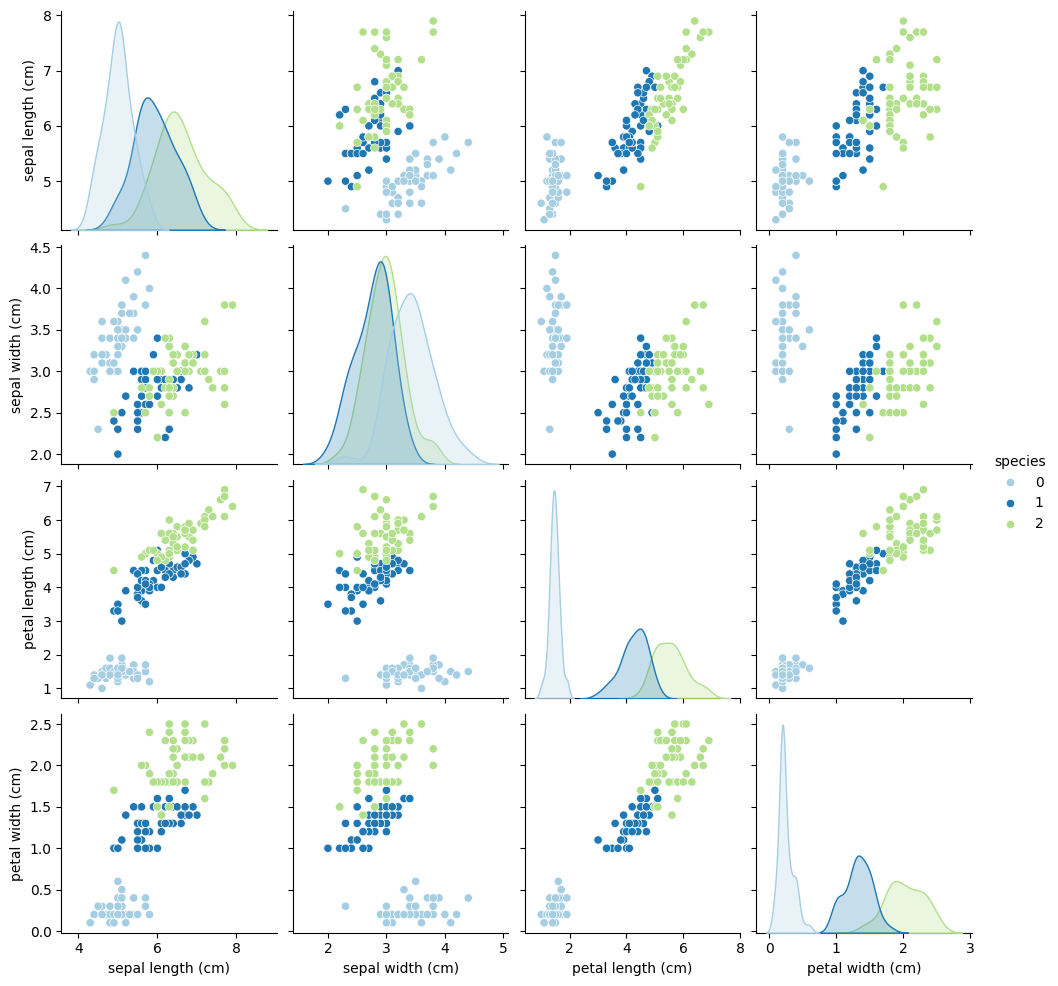

In [4]:
sns.pairplot(df, hue='species', palette='Paired')
plt.show()

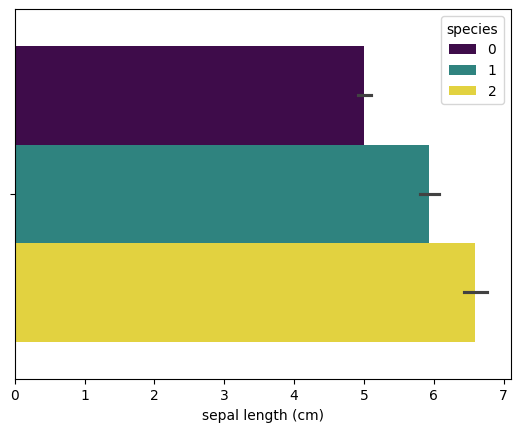

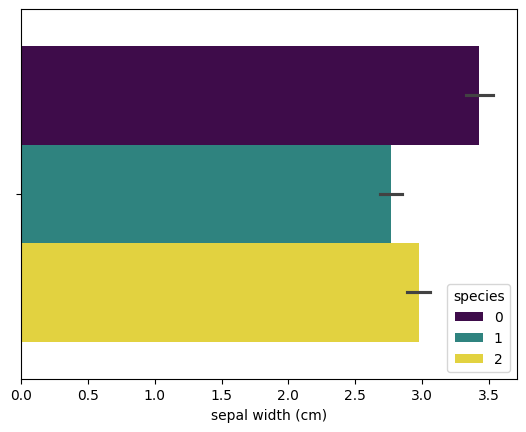

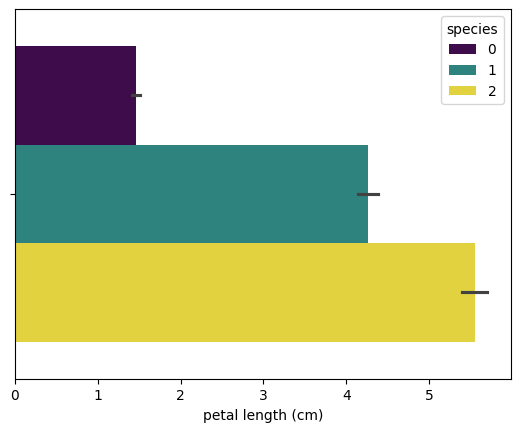

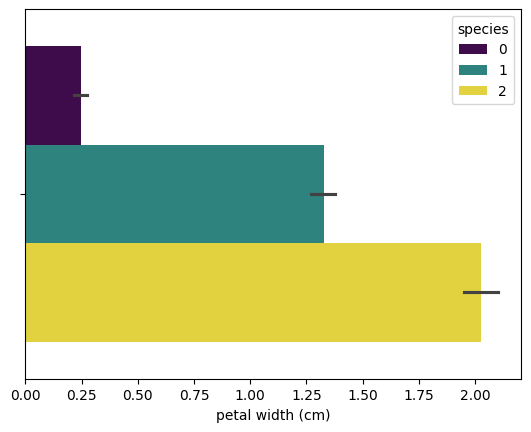

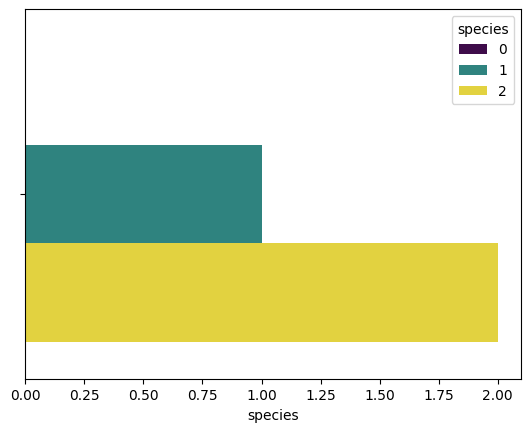

In [9]:
for i in df.columns:
    sns.barplot(df, x=i, hue="species", palette = "viridis")
    plt.show()

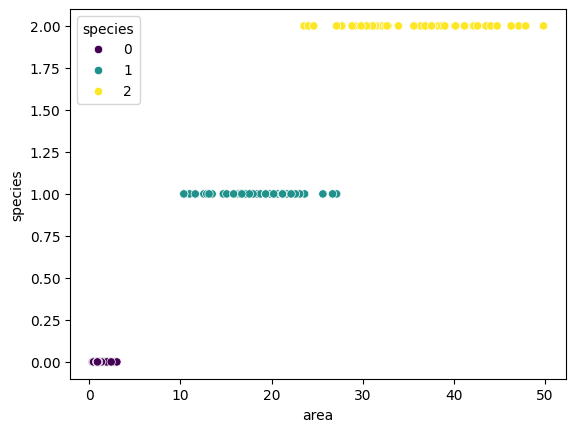

In [21]:
import math
df['area'] = math.pi*df['petal length (cm)']*df['petal width (cm)']

sns.scatterplot(df, x='area', y='species', hue='species', palette='viridis')
plt.show()



# Inference

there seems to be clear distinction between petal areas of different species

area <= 10 for 0
less than 30 for 1
others are 2

there is an overlap between 1 and 2 in 20 to 30 region, we will give that medial area

<Axes: xlabel='area_cat', ylabel='count'>

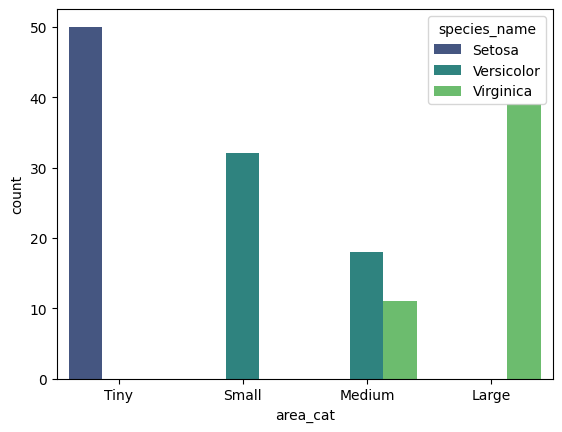

In [25]:
import numpy as np

df['area_cat'] = pd.cut(df['area'], 
                                   bins=[0,10,20,30, np.inf], 
                                   labels=["Tiny", "Small", "Medium", "Large"])
df['species_name'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})
# sns.barplot(df, x="area_cat", y="species_name", hue="species_name",  palette="viridis")
sns.countplot(data=df, x="area_cat", hue="species_name", palette="viridis")

We understand that tiny is always setosa, small is always versicolot, large is always virginica, but there is a mix of values for medium which we have to seperate using other values

<Axes: >

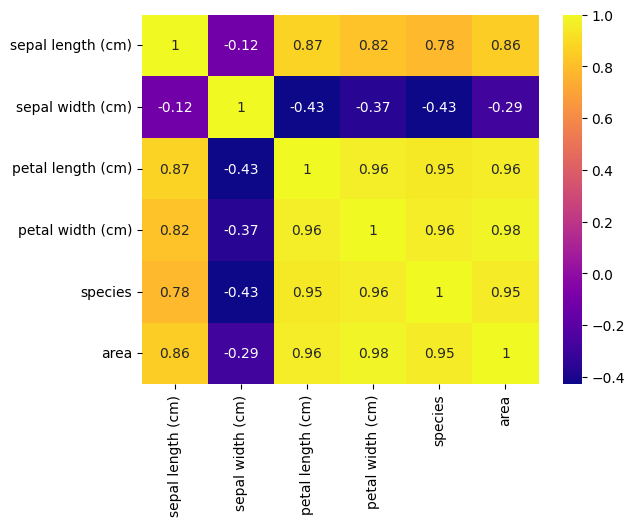

In [27]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='plasma')

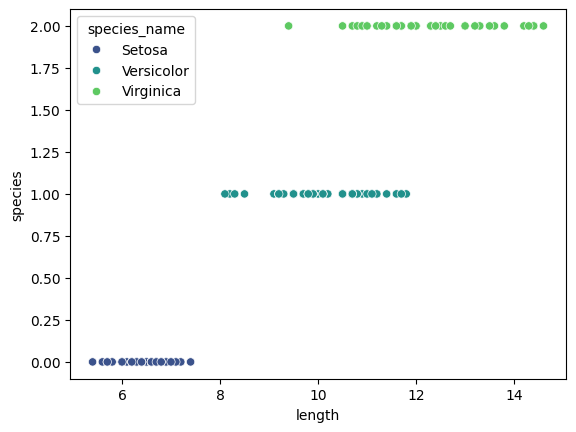

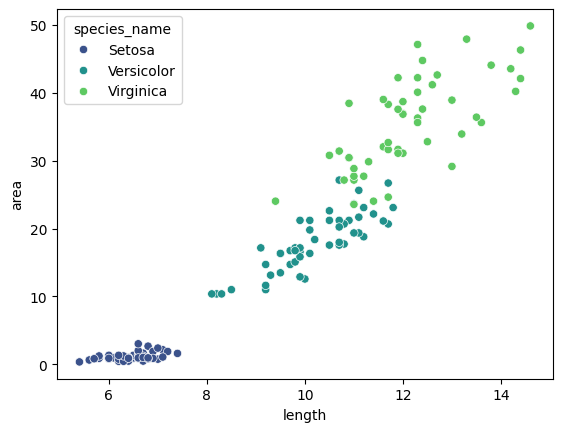

In [31]:
df['length'] = df['sepal length (cm)'] + df['petal length (cm)']
sns.scatterplot(df, x='length', y='species', hue='species_name', palette='viridis')
plt.show()
sns.scatterplot(df, x='length', y='area', hue='species_name', palette = 'viridis')
plt.show()

In [32]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'area', 'area_cat', 'species_name',
       'length'],
      dtype='object')

Seems like length and area are in itself a very strong predictors as it seems to have divided data in a very neat way

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define Features (X) and Target (y)
X = df[['area', 'length']] # Use numerical columns only
y = df['species']

# Split: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and fit
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
predictions = knn.predict(X_test)

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize your model
knn = KNeighborsClassifier(n_neighbors=3)

# Apply 5-fold cross-validation
# X and y should be your full dataset (scaled)
scores = cross_val_score(knn, scaler.fit_transform(X), y, cv=5)

print(f"Scores for each fold: {scores}")
print(f"Mean Accuracy: {scores.mean():.2f}")
print(f"Standard Deviation: {scores.std():.2f}")

Scores for each fold: [0.96666667 0.96666667 0.9        0.9        1.        ]
Mean Accuracy: 0.95
Standard Deviation: 0.04


# Conclusion

## Accuracy

We get a mean accuracy of 95% with cross validation, and 100% with single test-train split of 80-20

## Model Features

We used the K Nearest neighbour algorithm and features we used were both feature engineered, area (petal length* petal width) and length (petal length+sepal length).

